<a href="https://colab.research.google.com/github/adarshnitt/Spark-Internship-2021-Task-2/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Spark-Internship-2021, Task-2** <br>
Predicting optimum number of clusters for Iris Dataset

In [8]:
# mounting gdrive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np

In [11]:
df=pd.read_csv("/content/Iris (2).csv",index_col="Id")

In [12]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [13]:
x=df.iloc[:,:4]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [14]:
y=df.iloc[:,4]
y

Id
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: Species, Length: 150, dtype: object

In [15]:
y.shape

(150,)

In [16]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
from seaborn import pairplot

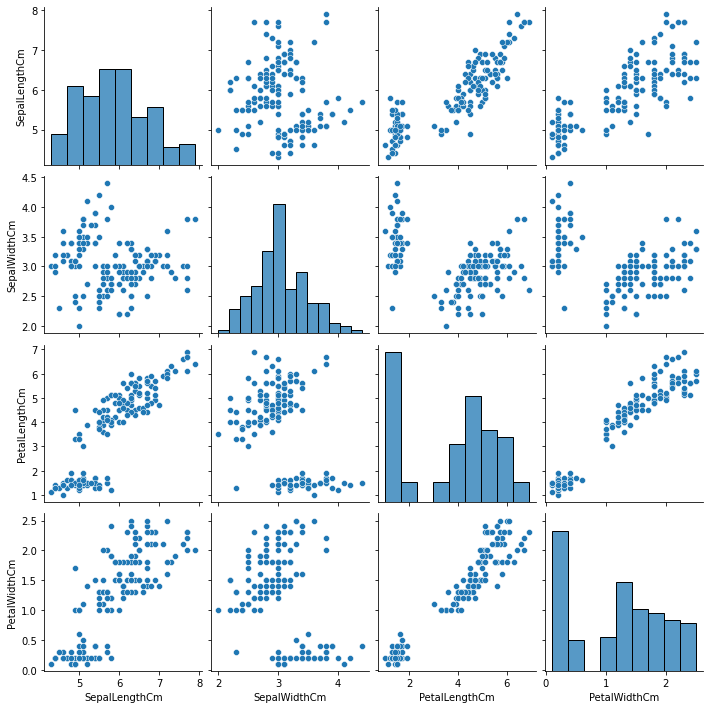

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
pairplot(df)

In [37]:
x.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
yy=le.fit_transform(y)

In [23]:
pd.Series(yy).unique()

array([0, 1, 2])

In [34]:
x.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [35]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [32]:
from sklearn.feature_selection import mutual_info_regression as mutual_info
inf=mutual_info(x,yy)
index=0
for k in x.columns:
  print(k,"------>",inf[index])
  index+=1

SepalLengthCm ------> 0.46198785459459124
SepalWidthCm ------> 0.21817191120735657
PetalLengthCm ------> 0.9788927112409316
PetalWidthCm ------> 0.9765947196164935


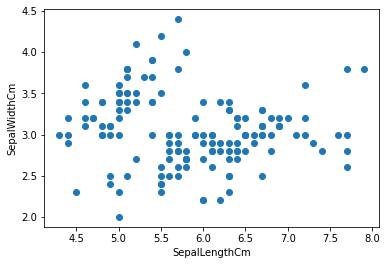

In [40]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm']);
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm');


In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
model=StandardScaler()
x_new=model.fit_transform(x)
xf=pd.DataFrame(x_new,columns=x.columns)
xf

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([-1.4444497 , -1.12891457, -0.81337944, -0.49784431, -0.18230919,
         0.13322594,  0.44876107,  0.7642962 ,  1.07983133,  1.39536646,
         1.71090158]),
 <a list of 10 Patch objects>)

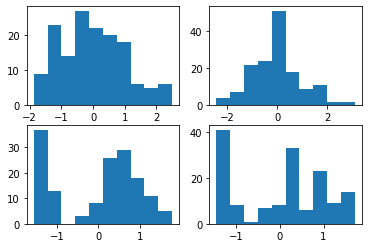

In [42]:

plt.subplots(2,2)
plt.subplot(2,2,1)
plt.hist(xf.iloc[:,0])
plt.subplot(2,2,2)
plt.hist(xf.iloc[:,1])
plt.subplot(2,2,3)
plt.hist(xf.iloc[:,2])
plt.subplot(2,2,4)
plt.hist(xf.iloc[:,3])

Text(3, 150, 'Pivot Point')

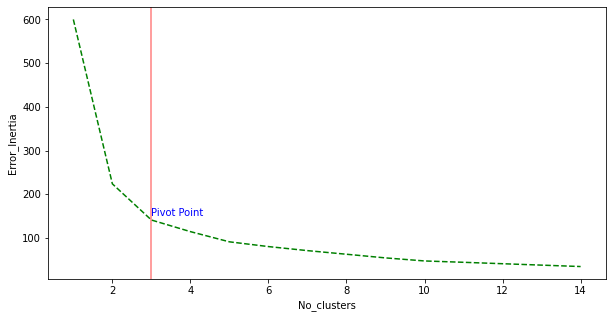

In [59]:
from sklearn.cluster import KMeans
base=[]
out=[]
for j in range(1,15):
  base.append(j)
  model=KMeans(n_clusters=j)
  model.fit_transform(xf)
  error=model.inertia_
  out.append(error)
plt.subplots(1,1,figsize=[10,5])
plt.subplot(1,1,1)
plt.xlabel("No_clusters")
plt.ylabel("Error_Inertia")
plt.plot(base,out,"--",color="green")
plt.axvline(3,dash_capstyle="projecting",color="red",alpha=0.5)
plt.text(3,150,"Pivot Point",color="Blue")

In [60]:
# optimum no of centrrid=2
model=KMeans(n_clusters=3)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [61]:
y_predicted=model.fit_predict(x)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [62]:
df['cluster']=y_predicted
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,0
147,6.3,2.5,5.0,1.9,Iris-virginica,2
148,6.5,3.0,5.2,2.0,Iris-virginica,0


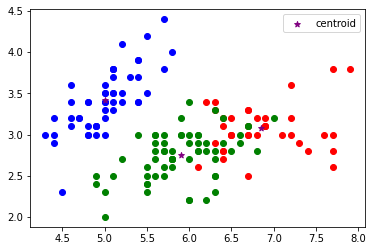

In [63]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1['SepalLengthCm'],df1['SepalWidthCm'],color='red')
plt.scatter(df2['SepalLengthCm'],df2['SepalWidthCm'],color='blue')
plt.scatter(df3['SepalLengthCm'],df3['SepalWidthCm'],color='green')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

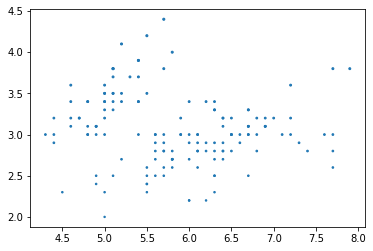

In [64]:
plt.scatter(df["SepalLengthCm"],df["SepalWidthCm"],df["SepalWidthCm"])

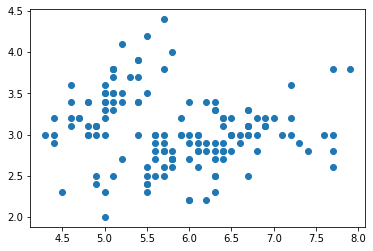

In [65]:
plt.scatter(df["SepalLengthCm"],df["SepalWidthCm"])

In [66]:
xf

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


No handles with labels found to put in legend.


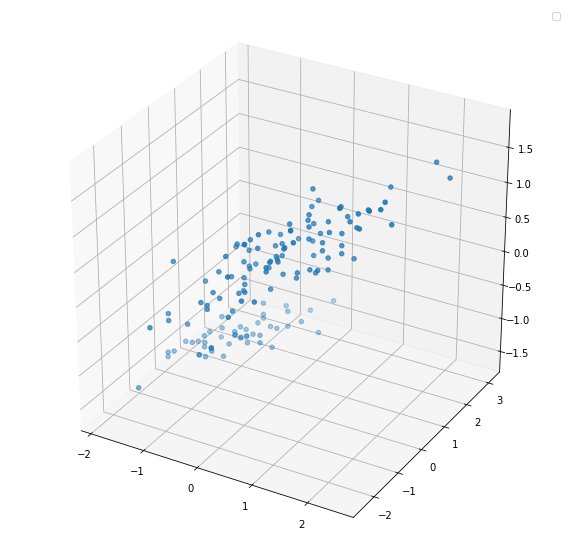

In [69]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=[10,10])
ax=fig.add_subplot(111,projection="3d")
ax.scatter3D(xf.iloc[:,0],xf.iloc[:,1],xf.iloc[:,2])
plt.legend()